In [63]:
####################################################################
# First phase
####################################################################
#!pip install keras
#!pip install tensorflow
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from os import makedirs
import pandas as pd
from sklearn.impute import SimpleImputer
import os.path
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from keras.models import load_model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.regularizers import L2
from numpy import argmax
import gc
from sklearn.model_selection import ShuffleSplit, KFold
from keras.layers import BatchNormalization
import numpy as np
    
# Load data
data = pd.read_csv('full.regular.txt', delim_whitespace=True)
#######################Normalizing############
#######When using neurons usually Normalizing helps the model learning process (Batchnormalization is usually enough, you dont need to use normailze and Batchnormailzation simultaneously).
#data["R13"]=normalize(np.reshape(np.array(data.loc[:,"R13"].tolist()),(-1,1)),axis=0)
#data["R14"]=normalize(np.reshape(np.array(data.loc[:,"R14"].tolist()),(-1,1)),axis=0)
#data["R15"]=normalize(np.reshape(np.array(data.loc[:,"R15"].tolist()),(-1,1)),axis=0)
############ Preprocessing for both first and second phase ################
# Correctly filter out invalid rows
###########################################################################
valid_labels = ['H', 'E', 'C']
invalid_rows = data[~data['Label'].isin(valid_labels)].index
invalid_rows_removed = data.drop(invalid_rows)

# delete left three columns
invalid_columns_removed = invalid_rows_removed.iloc[:, 2:]

# Separate features and labels
X = invalid_columns_removed.iloc[:, 1:]
y = invalid_columns_removed.iloc[:, 0]

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# One-hot encode labels
y = pd.get_dummies(y).values

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(BatchNormalization())#Batchnormalization (helps with reducing overfitting and learning speed)
    model.add(Dense(25, input_dim=trainX.shape[1], activation='relu',activity_regularizer=L2(0.01)))#L2 regularizer (helps with reducing overfitting, by penalizing large weights in neuron)
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=1, verbose=1)
    return model

# total data length
n_total = len(data)

# split into train and test
# Keep 80% data for training and 20% for testing
n_train = n_total * 80 // 100

# Split into train and test
first_phase_train_X = X[:n_train, :]
first_phase_train_y = y[:n_train]

second_phase_test_X = X[n_train:, :]
second_phase_test_y = y[n_train:]

print(first_phase_train_X.shape, second_phase_test_X.shape)

# Create directory for models if it doesn't exist
directory_path = 'stack_ensemble_models'
if not os.path.isdir(directory_path):
    makedirs(directory_path)

####################################################################
# End of preprocessing
####################################################################

trainX = first_phase_train_X
trainy = first_phase_train_y

# fit and save models
n_members = [1,2,3,4,5,6, 7, 8, 9, 10]
#cv=ShuffleSplit(n_splits=len(n_members), test_size=0.2, random_state=0) #For shuffled kfold
cv=KFold(n_splits=len(n_members))
#for i in n_members:
i=0
for inds,_ in cv.split(X=trainX, y=trainy):#Kfold (uses different part of the data to train the different models, reduces overfitting)
    print("working on model no. ", n_members[i])
    # fit model
    model = fit_model(trainX[inds], trainy[inds])
    # save model
    filename = os.path.join(directory_path, 'model_' + str(n_members[i]) + '.h5')
    model.save(filename)
    i+=1
    print('>Saved %s' % filename)
    del model
    del filename
    gc.collect()

C:\Users\nicol\AppData\Local\Temp\ipykernel_88680\3408492360.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('full.regular.txt', delim_whitespace=True)


(863307, 9) (215827, 9)
working on model no.  1


C:\Users\nicol\miniconda3\envs\scraping\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24281/24281 ━━━━━━━━━━━━━━━━━━━━ 18s 694us/step - accuracy: 0.7176 - loss: 0.7466


>Saved stack_ensemble_models\model_1.h5
working on model no.  2
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 18s 671us/step - accuracy: 0.7170 - loss: 0.7566


>Saved stack_ensemble_models\model_2.h5
working on model no.  3
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 17s 658us/step - accuracy: 0.7160 - loss: 0.7340


>Saved stack_ensemble_models\model_3.h5
working on model no.  4
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 19s 737us/step - accuracy: 0.7226 - loss: 0.7534


>Saved stack_ensemble_models\model_4.h5
working on model no.  5
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 21s 823us/step - accuracy: 0.7134 - loss: 0.7610


>Saved stack_ensemble_models\model_5.h5
working on model no.  6
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 22s 867us/step - accuracy: 0.7185 - loss: 0.7543


>Saved stack_ensemble_models\model_6.h5
working on model no.  7
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 23s 905us/step - accuracy: 0.7276 - loss: 0.7427


>Saved stack_ensemble_models\model_7.h5
working on model no.  8
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 19s 744us/step - accuracy: 0.7173 - loss: 0.7494


>Saved stack_ensemble_models\model_8.h5
working on model no.  9
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 17s 655us/step - accuracy: 0.7170 - loss: 0.7573


>Saved stack_ensemble_models\model_9.h5
working on model no.  10
24281/24281 ━━━━━━━━━━━━━━━━━━━━ 18s 687us/step - accuracy: 0.7191 - loss: 0.7508


>Saved stack_ensemble_models\model_10.h5


In [58]:
from keras.models import load_model, clone_model
from keras.utils import plot_model
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.regularizers import L2
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import BatchNormalization
import os
from numpy import argmax

# Load data
data = pd.read_csv('full.regular.txt', delim_whitespace=True)
#data["R13"]=normalize(np.reshape(np.array(data.loc[:,"R13"].tolist()),(-1,1)),axis=0)
#data["R14"]=normalize(np.reshape(np.array(data.loc[:,"R14"].tolist()),(-1,1)),axis=0)
#data["R15"]=normalize(np.reshape(np.array(data.loc[:,"R15"].tolist()),(-1,1)),axis=0)

# Correctly filter out invalid rows
valid_labels = ['H', 'E', 'C']
invalid_rows = data[~data['Label'].isin(valid_labels)].index
invalid_rows_removed = data.drop(invalid_rows)

# Delete left three columns
invalid_columns_removed = invalid_rows_removed.iloc[:, 2:]

# Separate features and labels
X = invalid_columns_removed.iloc[:, 1:]
y = invalid_columns_removed.iloc[:, 0]

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# One-hot encode labels
y = pd.get_dummies(y).values

# Total data length
n_total = len(data)

# Split into train and test
# Keep 80% data for training and 20% for testing
n_train = n_total * 80 // 100

# Split into train and test
first_phase_train_X = X[:n_train, :]
first_phase_train_y = y[:n_train]

second_phase_test_X = X[n_train:, :]
second_phase_test_y = y[n_train:]

print(first_phase_train_X.shape, second_phase_test_X.shape)

# Create directory for models if it doesn't exist
directory_path = 'stack_ensemble_models'
if not os.path.isdir(directory_path):
    os.makedirs(directory_path)

# Load all models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # Define filename for this ensemble
        filename = os.path.join(directory_path, 'model_' + str(i + 1) + '.h5')
        # Load model from file
        model = load_model(filename)
        # Add to list of members
        all_models.append(model)
        print('>Loaded %s' % filename)
    return all_models

# Define stacked model from multiple member input models
def define_stacked_model(members):
    # Create new models with unique names
    new_members = []
    for i, model in enumerate(members):
        new_model = clone_model(model)
        new_model.set_weights(model.get_weights())
        new_model._name = 'ensemble_model_' + str(i + 1)  # Rename the model
        for layer in new_model.layers:
            layer._name = 'ensemble_' + str(i + 1) + '_' + layer.name
        new_members.append(new_model)

    # Define multi-headed input
    ensemble_visible = [Input(shape=model.input_shape[1:], name='ensemble_input_' + str(i + 1)) for i, model in enumerate(new_members)]
    # Concatenate merge output from each model
    ensemble_outputs = [model(ensemble_visible[i]) for i, model in enumerate(new_members)]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(10, activation='relu',activity_regularizer=L2(0.01))(merge)
    output = Dense(3, activation='softmax')(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # Plot graph of ensemble
    file_name = os.path.join(directory_path, 'model_graph.png')
    plot_model(model, show_shapes=True, to_file=file_name)
    # Compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # Prepare input data
    X = [inputX for _ in range(len(model.input))]
    # Fit model
    model.fit(X, inputy, epochs=1, verbose=1)

# Make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # Prepare input data
    X = [inputX for _ in range(len(model.input))]
    # Make prediction
    return model.predict(X, verbose=1)

# Split into train and test
testX = second_phase_test_X
testy = second_phase_test_y
print('testX shape : ', testX.shape)

# Load all models
n_members = 10
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

# Define ensemble model
stacked_model = define_stacked_model(members)

# Fit stacked model on test dataset
fit_stacked_model(stacked_model, testX, testy)

# Make predictions and evaluate
yhat = predict_stacked_model(stacked_model, testX)
yhat = argmax(yhat, axis=1)
testy_labels = argmax(testy, axis=1)
acc = accuracy_score(testy_labels, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

C:\Users\nicol\AppData\Local\Temp\ipykernel_88680\4150489039.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('full.regular.txt', delim_whitespace=True)


(863307, 9) (215827, 9)
testX shape :  (215827, 9)
>Loaded stack_ensemble_models\model_1.h5
>Loaded stack_ensemble_models\model_2.h5
>Loaded stack_ensemble_models\model_3.h5
>Loaded stack_ensemble_models\model_4.h5


>Loaded stack_ensemble_models\model_5.h5
>Loaded stack_ensemble_models\model_6.h5
>Loaded stack_ensemble_models\model_7.h5
>Loaded stack_ensemble_models\model_8.h5
>Loaded stack_ensemble_models\model_9.h5
>Loaded stack_ensemble_models\model_10.h5
Loaded 10 models
You must install pydot (`pip install pydot`) for `plot_model` to work.
6745/6745 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7469 - loss: 0.7361
6745/6745 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Stacked Test Accuracy: 0.767


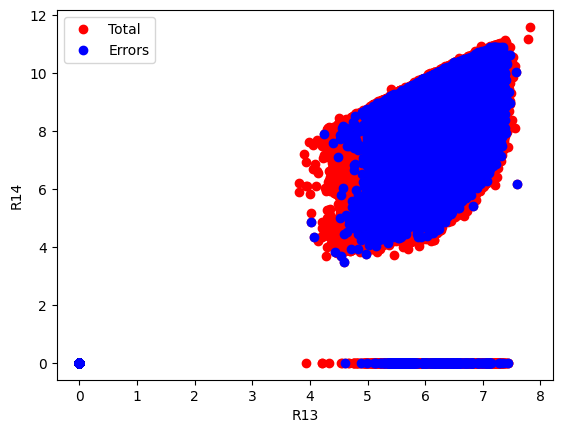

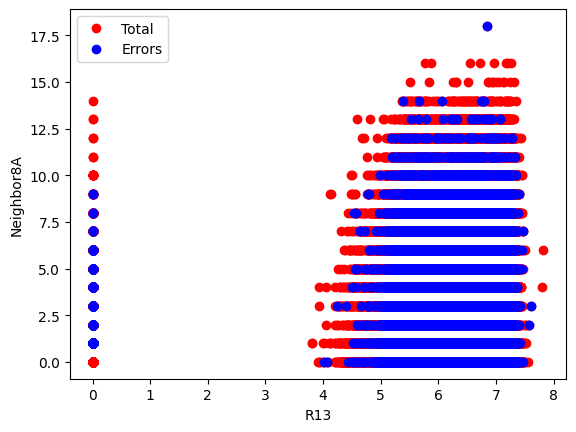

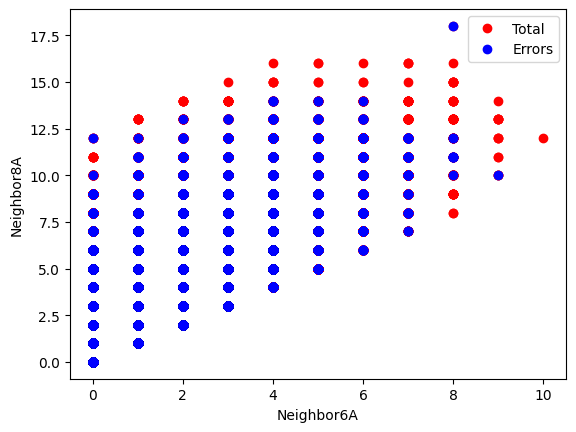

In [60]:
###############Visualize the data to identified special area with errors#################
#Visualize every data points and those with errors for each pairs of columns to identify special areas to train the models on
#!pip install matplotlib
import matplotlib.pyplot as plt
errs=data.loc[n_train:,:].loc[testy_labels!=yhat]
#errs=errs[errs["R13"]>5]
plt.plot(data["R13"],data["R14"],"or",label="Total")
plt.plot(errs["R13"],errs["R14"],"ob",label="Errors") # ob = type de points "o" ronds, "b" bleus
plt.xlabel("R13") ; plt.ylabel("R14")
plt.legend()
plt.show()

plt.plot(data["R13"],data["Neighbor8A"],"or",label="Total")
plt.plot(errs["R13"],errs["Neighbor8A"],"ob",label="Errors")
plt.xlabel("R13") ; plt.ylabel("Neighbor8A") 
plt.legend()
plt.show()
plt.plot(data["Neighbor6A"],data["Neighbor8A"],"or",label="Total")
plt.plot(errs["Neighbor6A"],errs["Neighbor8A"],"ob",label="Errors") 
plt.xlabel("Neighbor6A") ; plt.ylabel("Neighbor8A")
plt.legend()
plt.show()

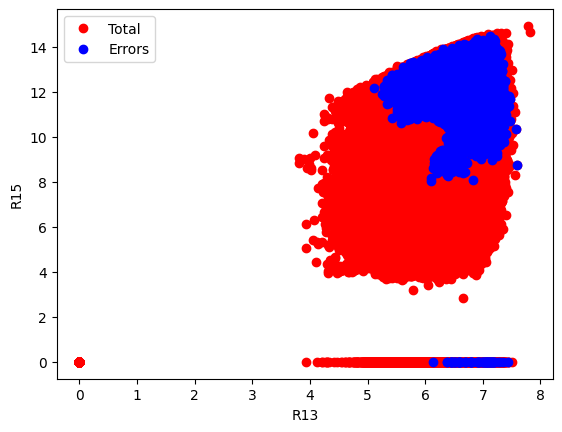

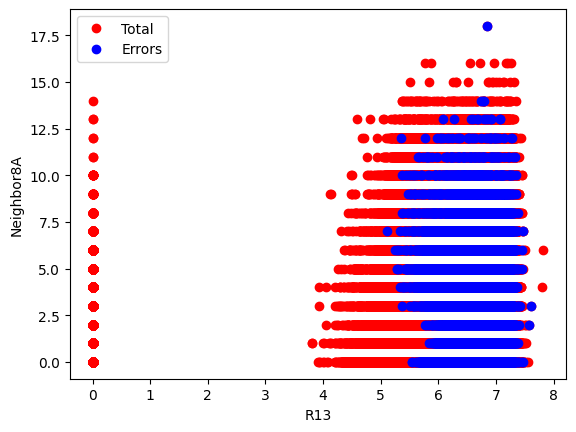

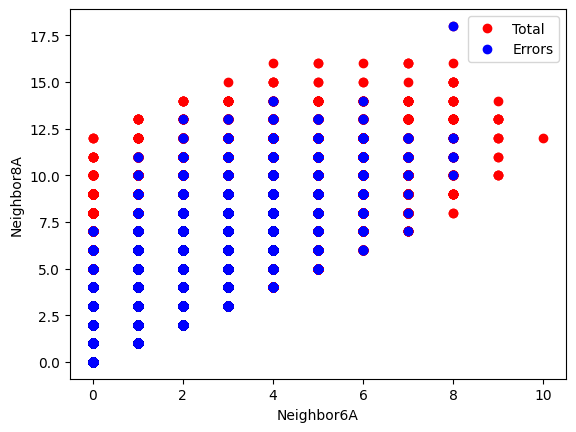

In [61]:
###############Visualize the data to identified special area with errors#################
#Visualize every data points and those with errors for each pairs of columns to identify special areas to train the models on
errs=data.loc[n_train:,:].loc[np.logical_and(testy_labels!=yhat, yhat==1)] #Check for every labels to identify special areas to train the models on
data0=data.loc[n_train:,:].loc[testy[:,1],:]
plt.plot(data["R13"],data["R15"],"or",label="Total")
plt.plot(errs["R13"],errs["R15"],"ob",label="Errors") # ob = type de points "o" ronds, "b" bleus
plt.xlabel("R13") ; plt.ylabel("R15")
plt.legend()
plt.show()

plt.plot(data["R13"],data["Neighbor8A"],"or",label="Total")
plt.plot(errs["R13"],errs["Neighbor8A"],"ob",label="Errors") 
plt.xlabel("R13") ; plt.ylabel("Neighbor8A")
plt.legend()
plt.show()
plt.plot(data["Neighbor6A"],data["Neighbor8A"],"or",label="Total")
plt.plot(errs["Neighbor6A"],errs["Neighbor8A"],"ob",label="Errors") 
plt.xlabel("Neighbor6A") ; plt.ylabel("Neighbor8A")
plt.legend()
plt.show()

In [53]:
####################################################################
# Train models on a specific area : Phase 1
####################################################################
#!pip install keras
#!pip install tensorflow
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from os import makedirs
import pandas as pd
from sklearn.impute import SimpleImputer
import os.path
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from keras.models import load_model
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.regularizers import L2
from numpy import argmax
import gc
from sklearn.model_selection import ShuffleSplit
from keras.layers import BatchNormalization
import numpy as np
    
# Load data
data = pd.read_csv('full.regular.txt', delim_whitespace=True)
#data["R13"]=normalize(np.reshape(np.array(data.loc[:,"R13"].tolist()),(-1,1)),axis=0)
#data["R14"]=normalize(np.reshape(np.array(data.loc[:,"R14"].tolist()),(-1,1)),axis=0)
#data["R15"]=normalize(np.reshape(np.array(data.loc[:,"R15"].tolist()),(-1,1)),axis=0)
############ Preprocessing for both first and second phase ################
# Correctly filter out invalid rows
###########################################################################

valid_labels = ['H', 'E', 'C']
invalid_rows = data[~data['Label'].isin(valid_labels)].index
invalid_rows_removed = data.drop(invalid_rows)

# delete left three columns
invalid_columns_removed = invalid_rows_removed.iloc[:, 2:]

# Separate features and labels
X = invalid_columns_removed.iloc[:, 1:]
y = invalid_columns_removed.iloc[:, 0]

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# One-hot encode labels
y = pd.get_dummies(y).values

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(BatchNormalization())#Batchnormalization
    model.add(Dense(25, input_dim=trainX.shape[1], activation='relu'))#L2 regularizer ,activity_regularizer=L2(0.01)
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=1, verbose=1)
    return model

# total data length
n_total = len(data)

# split into train and test
# Keep 80% data for training and 20% for testing
n_train = n_total * 80 // 100

# Split into train and test
first_phase_train_X = X[:n_train, :]
first_phase_train_y = y[:n_train]

second_phase_test_X = X[n_train:, :]
second_phase_test_y = y[n_train:]

print(first_phase_train_X.shape, second_phase_test_X.shape)

# Create directory for models if it doesn't exist
directory_path = 'stack_ensemble_models'
if not os.path.isdir(directory_path):
    makedirs(directory_path)

####################################################################
# End of preprocessing
####################################################################

trainX = first_phase_train_X
trainy = first_phase_train_y

inds_err=testX[:,0]>5.5
testX=testX[inds_err]
testy=testy[inds_err]
# fit and save models
n_members = [1,2,3,4,5,6, 7, 8, 9, 10]
cv=ShuffleSplit(n_splits=len(n_members), test_size=0.2, random_state=0)
#for i in n_members:
i=0
for inds,_ in cv.split(X=trainX, y=trainy):#Kfold
    print("working on model no. ", n_members[i])
    # fit model
    model = fit_model(trainX[inds], trainy[inds])
    # save model
    filename = os.path.join(directory_path, 'model_R13over5_' + str(n_members[i]) + '.h5')
    model.save(filename)
    i+=1
    print('>Saved %s' % filename)
    del model
    del filename
    gc.collect()

C:\Users\nicol\AppData\Local\Temp\ipykernel_88680\4151676086.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('full.regular.txt', delim_whitespace=True)


(863307, 9) (215827, 9)
working on model no.  1


C:\Users\nicol\miniconda3\envs\scraping\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21583/21583 ━━━━━━━━━━━━━━━━━━━━ 15s 642us/step - accuracy: 0.7328 - loss: 0.6102


>Saved stack_ensemble_models\model_R13over5_1.h5
working on model no.  2
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 16s 714us/step - accuracy: 0.7283 - loss: 0.6133


>Saved stack_ensemble_models\model_R13over5_2.h5
working on model no.  3
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 16s 680us/step - accuracy: 0.7313 - loss: 0.6077


>Saved stack_ensemble_models\model_R13over5_3.h5
working on model no.  4
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 17s 725us/step - accuracy: 0.7339 - loss: 0.6012


>Saved stack_ensemble_models\model_R13over5_4.h5
working on model no.  5
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 16s 710us/step - accuracy: 0.7340 - loss: 0.6106


>Saved stack_ensemble_models\model_R13over5_5.h5
working on model no.  6
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 16s 695us/step - accuracy: 0.7287 - loss: 0.6102


>Saved stack_ensemble_models\model_R13over5_6.h5
working on model no.  7
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 19s 848us/step - accuracy: 0.7312 - loss: 0.6101


>Saved stack_ensemble_models\model_R13over5_7.h5
working on model no.  8
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 18s 778us/step - accuracy: 0.7346 - loss: 0.6037


>Saved stack_ensemble_models\model_R13over5_8.h5
working on model no.  9
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 17s 741us/step - accuracy: 0.7309 - loss: 0.6077


>Saved stack_ensemble_models\model_R13over5_9.h5
working on model no.  10
21583/21583 ━━━━━━━━━━━━━━━━━━━━ 16s 701us/step - accuracy: 0.7311 - loss: 0.6135


>Saved stack_ensemble_models\model_R13over5_10.h5


In [54]:
from keras.models import load_model, clone_model
from keras.utils import plot_model
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.regularizers import L2
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import BatchNormalization
import os
from numpy import argmax

# Load data
data = pd.read_csv('full.regular.txt', delim_whitespace=True)
#data["R13"]=normalize(np.reshape(np.array(data.loc[:,"R13"].tolist()),(-1,1)),axis=0)
#data["R14"]=normalize(np.reshape(np.array(data.loc[:,"R14"].tolist()),(-1,1)),axis=0)
#data["R15"]=normalize(np.reshape(np.array(data.loc[:,"R15"].tolist()),(-1,1)),axis=0)

# Correctly filter out invalid rows
valid_labels = ['H', 'E', 'C']
invalid_rows = data[~data['Label'].isin(valid_labels)].index
invalid_rows_removed = data.drop(invalid_rows)

# Delete left three columns
invalid_columns_removed = invalid_rows_removed.iloc[:, 2:]

# Separate features and labels
X = invalid_columns_removed.iloc[:, 1:]
y = invalid_columns_removed.iloc[:, 0]

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# One-hot encode labels
y = pd.get_dummies(y).values

# Total data length
n_total = len(data)

# Split into train and test
# Keep 80% data for training and 20% for testing
n_train = n_total * 80 // 100

# Split into train and test
first_phase_train_X = X[:n_train, :]
first_phase_train_y = y[:n_train]

second_phase_test_X = X[n_train:, :]
second_phase_test_y = y[n_train:]

print(first_phase_train_X.shape, second_phase_test_X.shape)

# Create directory for models if it doesn't exist
directory_path = 'stack_ensemble_models'
if not os.path.isdir(directory_path):
    os.makedirs(directory_path)

# Load all models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # Define filename for this ensemble
        filename = os.path.join(directory_path, 'model_R13over5_' + str(i + 1) + '.h5')
        # Load model from file
        model = load_model(filename)
        # Add to list of members
        all_models.append(model)
        print('>Loaded %s' % filename)
    return all_models

# Define stacked model from multiple member input models
def define_stacked_model(members):
    # Create new models with unique names
    new_members = []
    for i, model in enumerate(members):
        new_model = clone_model(model)
        new_model.set_weights(model.get_weights())
        new_model._name = 'ensemble_model_R13over5_' + str(i + 1)  # Rename the model
        for layer in new_model.layers:
            layer._name = 'ensemble_' + str(i + 1) + '_' + layer.name
        new_members.append(new_model)

    # Define multi-headed input
    ensemble_visible = [Input(shape=model.input_shape[1:], name='ensemble_input_' + str(i + 1)) for i, model in enumerate(new_members)]
    # Concatenate merge output from each model
    ensemble_outputs = [model(ensemble_visible[i]) for i, model in enumerate(new_members)]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(10, activation='relu',activity_regularizer=L2(0.01))(merge)
    output = Dense(3, activation='softmax')(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # Plot graph of ensemble
    file_name = os.path.join(directory_path, 'model_graph.png')
    plot_model(model, show_shapes=True, to_file=file_name)
    # Compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # Prepare input data
    X = [inputX for _ in range(len(model.input))]
    # Fit model
    model.fit(X, inputy, epochs=1, verbose=1)

# Make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # Prepare input data
    X = [inputX for _ in range(len(model.input))]
    # Make prediction
    return model.predict(X, verbose=1)

# Split into train and test
testX = second_phase_test_X
testy = second_phase_test_y
print('testX shape : ', testX.shape)
inds_err=testX[:,0]>5.5
testX=testX[inds_err]
testy=testy[inds_err]
# Load all models
n_members = 10
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

# Define ensemble model
stacked_model_R13over5 = define_stacked_model(members)

# Fit stacked model on test dataset
fit_stacked_model(stacked_model_R13over5, testX, testy)

# Make predictions and evaluate
yhat = predict_stacked_model(stacked_model_R13over5, testX)
yhat = argmax(yhat, axis=1)
testy_labels = argmax(testy, axis=1)
acc = accuracy_score(testy_labels, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

C:\Users\nicol\AppData\Local\Temp\ipykernel_88680\3703321275.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('full.regular.txt', delim_whitespace=True)


(863307, 9) (215827, 9)
testX shape :  (215827, 9)
>Loaded stack_ensemble_models\model_R13over5_1.h5
>Loaded stack_ensemble_models\model_R13over5_2.h5
>Loaded stack_ensemble_models\model_R13over5_3.h5
>Loaded stack_ensemble_models\model_R13over5_4.h5
>Loaded stack_ensemble_models\model_R13over5_5.h5
>Loaded stack_ensemble_models\model_R13over5_6.h5


>Loaded stack_ensemble_models\model_R13over5_7.h5
>Loaded stack_ensemble_models\model_R13over5_8.h5
>Loaded stack_ensemble_models\model_R13over5_9.h5
>Loaded stack_ensemble_models\model_R13over5_10.h5
Loaded 10 models
You must install pydot (`pip install pydot`) for `plot_model` to work.
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6928 - loss: 0.8675
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Stacked Test Accuracy: 0.735


In [51]:
#Compute accuracy for the specialized model + general model
data = pd.read_csv('full.regular.txt', delim_whitespace=True)

# Correctly filter out invalid rows
valid_labels = ['H', 'E', 'C']
invalid_rows = data[~data['Label'].isin(valid_labels)].index
invalid_rows_removed = data.drop(invalid_rows)

# Delete left three columns
invalid_columns_removed = invalid_rows_removed.iloc[:, 2:]

# Separate features and labels
X = invalid_columns_removed.iloc[:, 1:]
y = invalid_columns_removed.iloc[:, 0]

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# One-hot encode labels
y = pd.get_dummies(y).values

# Total data length
n_total = len(data)

# Split into train and test
# Keep 80% data for training and 20% for testing
n_train = n_total * 80 // 100

# Split into train and test
first_phase_train_X = X[:n_train, :]
first_phase_train_y = y[:n_train]

second_phase_test_X = X[n_train:, :]
second_phase_test_y = y[n_train:]
# Split into train and test
testX = second_phase_test_X
testy = second_phase_test_y
print('testX shape : ', testX.shape)
#Divide the data for each models
inds_err_R13over5=testX[:,0]>5.5
testX_R13over5=testX[inds_err_R13over5]
testy_R13over5=testy[inds_err_R13over5]
inds_err_R13under5=testX[:,0]<=5.5
testX_R13under5=testX[inds_err_R13under5]
testy_R13under5=testy[inds_err_R13under5]

#Predict on each models
yhat = predict_stacked_model(stacked_model, testX_R13under5)
yhat = argmax(yhat, axis=1)
testy_labels = argmax(testy_R13under5, axis=1)
acc = accuracy_score(testy_labels, yhat)
print('Stacked Test Accuracy with R13 under 5: %.3f' % acc)
n_0=len(testy_R13under5)
acc_0=acc

yhat = predict_stacked_model(stacked_model_R13over5, testX_R13over5)
yhat = argmax(yhat, axis=1)
testy_labels = argmax(testy_R13over5, axis=1)
acc = accuracy_score(testy_labels, yhat)
print('Stacked Test Accuracy with R13 over 5: %.3f' % acc)
n_1=len(testy_R13over5)
acc_1=acc

#Compute the new accuracy
print('New Stacked Test Accuracy: %.3f' % ((acc_0*n_0+acc_1*n_1)/(n_0+n_1)))

C:\Users\nicol\AppData\Local\Temp\ipykernel_88680\2815793577.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('full.regular.txt', delim_whitespace=True)


testX shape :  (215827, 9)
4893/4893 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Stacked Test Accuracy with R13 under 5: 0.800
1852/1852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Stacked Test Accuracy with R13 over 5: 0.722
New Stacked Test Accuracy: 0.778
